# Loading Libraries

In [71]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from fancyimpute import KNN
%matplotlib inline
from ggplot import *
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

In [72]:
##Setting working directory
os.chdir('E:/Project/Churn reduction')

In [73]:
os.getcwd()

'E:\\Project\\Churn reduction'

In [74]:
df = pd.read_csv('E:/Project/Churn reduction/Train_data.csv')

In [75]:
df1 = pd.read_csv('E:/Project/Churn reduction/Test_data.csv')

In [76]:
df3 = pd.concat([df,df1])

In [77]:
df3.to_csv('churn_reduction.csv', index=False)

In [78]:
churn_red = pd.read_csv('E:/Project/Churn reduction/churn_reduction.csv')

In [79]:
churn_red.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [80]:
churn_red.dtypes

state                             object
account length                     int64
area code                          int64
phone number                      object
international plan                object
voice mail plan                   object
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                             object
dtype: object

In [81]:
#Since we do not require few variables because we have to predict the churn score based on usage pattern so variables like 
#"area code", "phone number" and "state" are not important so we will drop them.
churn_red.drop(['state', 'area code','phone number'], axis=1, inplace=True)

In [82]:
churn_red.shape

(5000, 18)

In [83]:
churn_red.head(5)

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [84]:
#Converting categorical variable into 1 and 0 i.e. for yes = 1 and for no = 0
lis = []
for i in range(0, churn_red.shape[1]):
    #print(i)
    if(churn_red.iloc[:,i].dtypes == 'object'):
        churn_red.iloc[:,i] = pd.Categorical(churn_red.iloc[:,i])
        #print(churn_red[[i]])
        churn_red.iloc[:,i] = churn_red.iloc[:,i].cat.codes 
        churn_red.iloc[:,i] = churn_red.iloc[:,i].astype('object')
        
        lis.append(churn_red.columns[i])

In [85]:
churn_red.head(5)

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [86]:
churn_red.dtypes

account length                     int64
international plan                object
voice mail plan                   object
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                             object
dtype: object

# Missing Value Analysis

In [87]:
churn_red.isnull().sum()

account length                   0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

In [88]:
#As above we can clearly see that we don't have any missing values present in data set hence we will move to outlier analysis.

In [89]:
#Storing continuous and categorical variable in different objects
variable_num = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
               'total eve minutes', 'total eve calls', 'total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes', 'total intl calls','total intl charge',
                'number customer service calls']

variable_cat = ['international plan', 'voice mail plan', 'Churn']

# Outlier Analysis

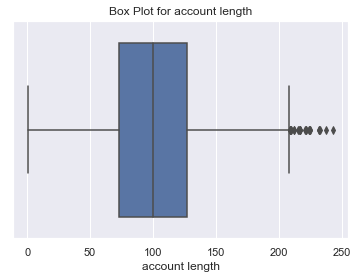

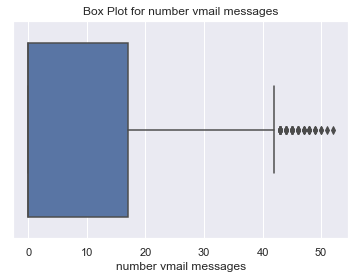

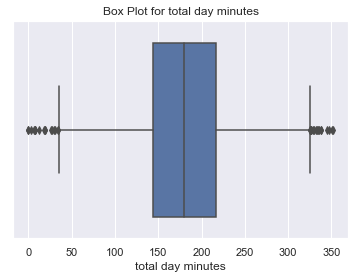

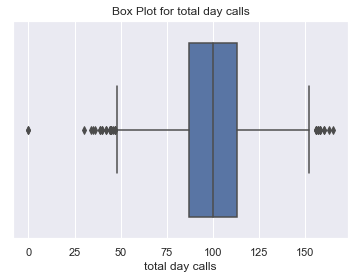

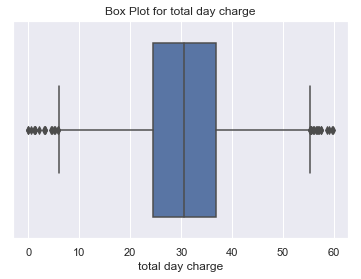

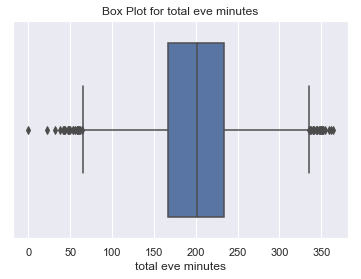

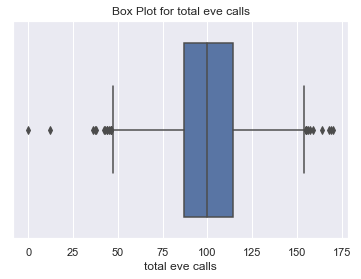

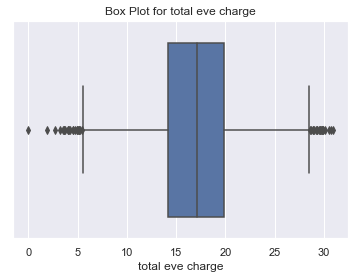

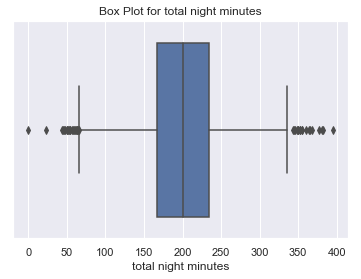

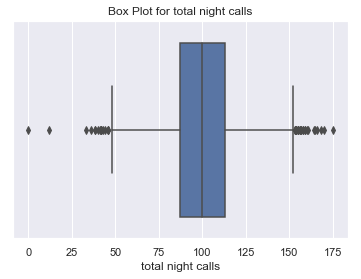

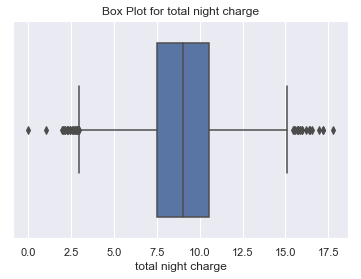

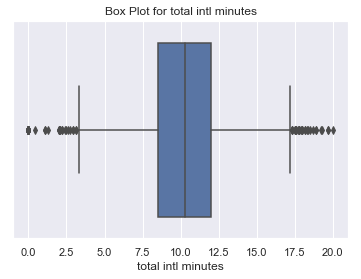

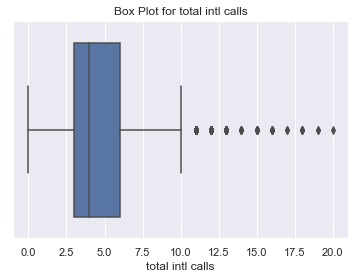

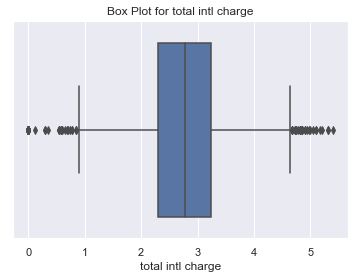

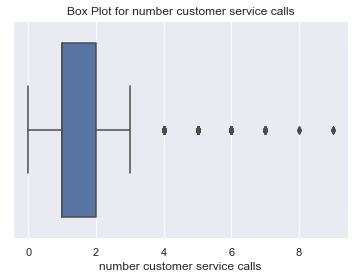

In [90]:
#Outlier analysis using box plot method.
sns.set()
for i in variable_num:
    sns.boxplot(churn_red[i])
    plt.title("Box Plot for "+str(i))
    plt.show()

In [91]:
churn_red.shape

(5000, 18)

In [92]:
#detect and replace outliers with NA
#Extracting quartiles
for i in variable_num:
    q75,q25=np.percentile(churn_red[i],[75,25])
  



   ##calculating iqr
    iqr=q75-q25

    #calculating inner and outer fence
    minimum= q25-(iqr*1.5)
    maximum= q75+(iqr*1.5)

    #replace with NA
    churn_red.loc[churn_red[i]<minimum,i] = np.nan
    churn_red.loc[churn_red[i]>maximum,i] = np.nan

In [93]:
#Checking missing values created by outliers
churn_missing_value = churn_red.isnull().sum()

In [94]:
churn_missing_value

account length                    24
international plan                 0
voice mail plan                    0
number vmail messages             60
total day minutes                 34
total day calls                   35
total day charge                  34
total eve minutes                 43
total eve calls                   27
total eve charge                  42
total night minutes               39
total night calls                 43
total night charge                39
total intl minutes                72
total intl calls                 118
total intl charge                 72
number customer service calls    399
Churn                              0
dtype: int64

In [95]:
#create data frame with missing values
churn_missing_val = pd.DataFrame(churn_red.isnull().sum())

In [96]:
churn_missing_val

,0
account length,24
international plan,0
voice mail plan,0
number vmail messages,60
total day minutes,34
total day calls,35
total day charge,34
total eve minutes,43
total eve calls,27
total eve charge,42


In [97]:
#Reset index
churn_missing_val = churn_missing_val.reset_index()

In [98]:
churn_missing_val

,index,0
0,account length,24
1,international plan,0
2,voice mail plan,0
3,number vmail messages,60
4,total day minutes,34
5,total day calls,35
6,total day charge,34
7,total eve minutes,43
8,total eve calls,27
9,total eve charge,42


In [99]:
#Renaming the columns
churn_missing_val = churn_missing_val.rename(columns = {'index':'variables',0:'missing_percentage'})

In [100]:
churn_missing_val

,variables,missing_percentage
0,account length,24
1,international plan,0
2,voice mail plan,0
3,number vmail messages,60
4,total day minutes,34
5,total day calls,35
6,total day charge,34
7,total eve minutes,43
8,total eve calls,27
9,total eve charge,42


In [101]:
#calculating percentage
churn_missing_val['missing_percentage'] = (churn_missing_val['missing_percentage']/len(churn_red))*100

In [102]:
churn_missing_val

,variables,missing_percentage
0,account length,0.48
1,international plan,0.00
2,voice mail plan,0.00
3,number vmail messages,1.20
4,total day minutes,0.68
5,total day calls,0.70
6,total day charge,0.68
7,total eve minutes,0.86
8,total eve calls,0.54
9,total eve charge,0.84


In [103]:
churn_missing_val.to_csv('E:/Project/Churn reduction/missing_value_perc.csv')

In [104]:
#Creating copy
cr = churn_red.copy()

In [105]:
cr1=churn_red.copy()

In [106]:
#Creating missing value
churn_red['account length'].iloc[10]

65.0

In [107]:
#Imputation method
#actual value = 65
#Mean = 99.68
#Median = 100
#KNN = 79.46

In [108]:
churn_red['account length'].iloc[10] = np.nan

C:\Users\Aditya\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [109]:
churn_red['account length'].iloc[10]

nan

In [110]:
#Impute with mean
churn_red['account length'] = churn_red['account length'].fillna(churn_red['account length'].mean())

In [111]:
churn_red['account length'].iloc[10]

99.68522613065326

In [112]:
#Loading data set again
churn_red = cr.copy()

In [113]:
churn_red['account length'].iloc[10] = np.nan

C:\Users\Aditya\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [114]:
#Impute with median
churn_red['account length'] = churn_red['account length'].fillna(churn_red['account length'].median())

In [115]:
churn_red['account length'].iloc[10]

100.0

In [116]:
#impute with knn
#Loading data set again
churn_red = cr1.copy()

In [117]:
churn_red['account length'].iloc[10] = np.nan

C:\Users\Aditya\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [118]:
#Applying KNN imputation method
churn_red = pd.DataFrame(KNN(k = 3).fit_transform(churn_red), columns = churn_red.columns)

Imputing row 1/5000 with 0 missing, elapsed time: 6.765
Imputing row 101/5000 with 1 missing, elapsed time: 6.767
Imputing row 201/5000 with 0 missing, elapsed time: 6.768
Imputing row 301/5000 with 0 missing, elapsed time: 6.769
Imputing row 401/5000 with 0 missing, elapsed time: 6.771
Imputing row 501/5000 with 0 missing, elapsed time: 6.771
Imputing row 601/5000 with 0 missing, elapsed time: 6.771
Imputing row 701/5000 with 0 missing, elapsed time: 6.771
Imputing row 801/5000 with 0 missing, elapsed time: 6.771
Imputing row 901/5000 with 0 missing, elapsed time: 6.771
Imputing row 1001/5000 with 0 missing, elapsed time: 6.771
Imputing row 1101/5000 with 0 missing, elapsed time: 6.780
Imputing row 1201/5000 with 1 missing, elapsed time: 6.780
Imputing row 1301/5000 with 0 missing, elapsed time: 6.780
Imputing row 1401/5000 with 2 missing, elapsed time: 6.780
Imputing row 1501/5000 with 0 missing, elapsed time: 6.780
Imputing row 1601/5000 with 0 missing, elapsed time: 6.780
Imputing 

In [119]:
churn_red['account length'].iloc[10]

79.4621474951254

In [120]:
#Here we will go with knn imputation method as we have seen earlier that actual value was 65 and knn gave the result as 
#79.46 which is close to actual value hence we will impute na with knn.

In [121]:
churn_red.isnull().sum()

account length                   0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

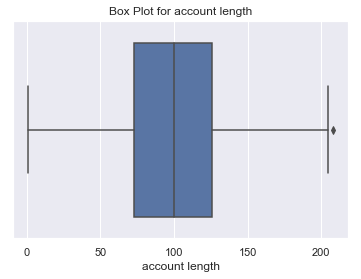

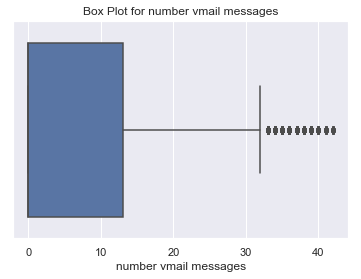

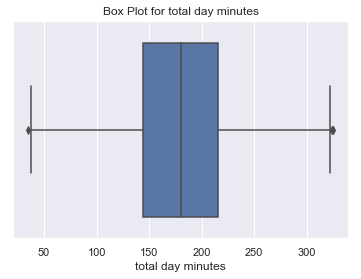

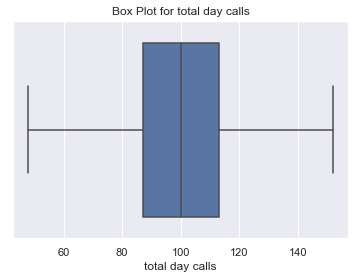

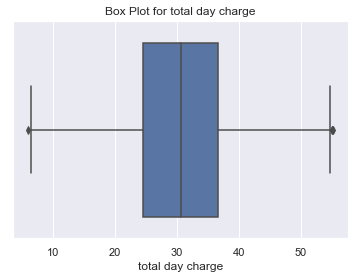

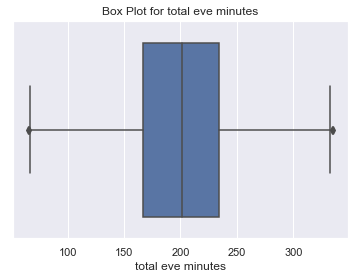

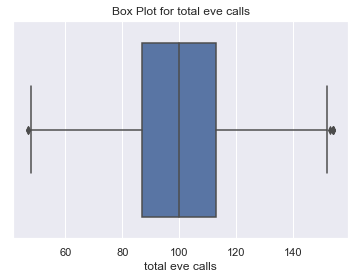

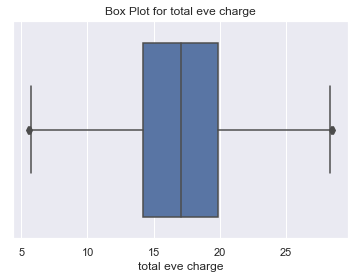

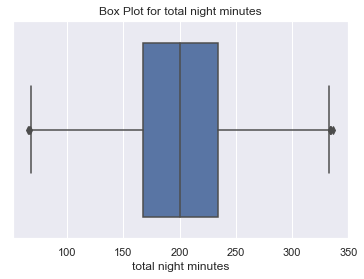

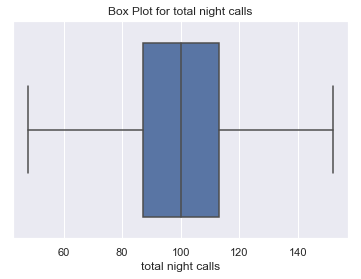

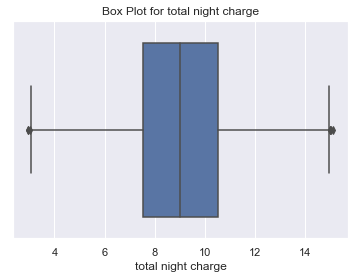

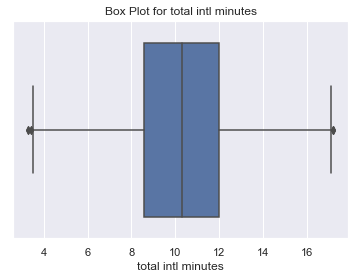

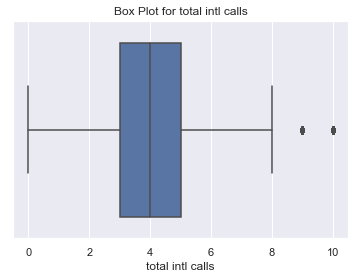

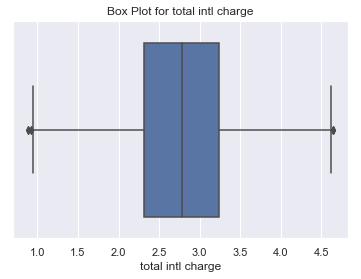

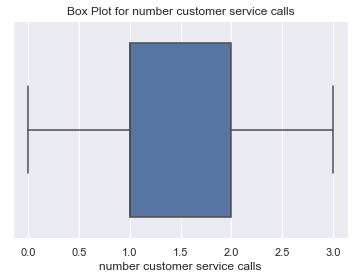

In [122]:
#Drawing box plot after replacement of outliers
sns.set()
for i in variable_num:
    sns.boxplot(churn_red[i])
    plt.title("Box Plot for "+str(i))
    plt.show()

In [123]:
#creating copy
df = churn_red.copy()

# Feature Selection

In [124]:
br_corr = churn_red.loc[:,variable_num]

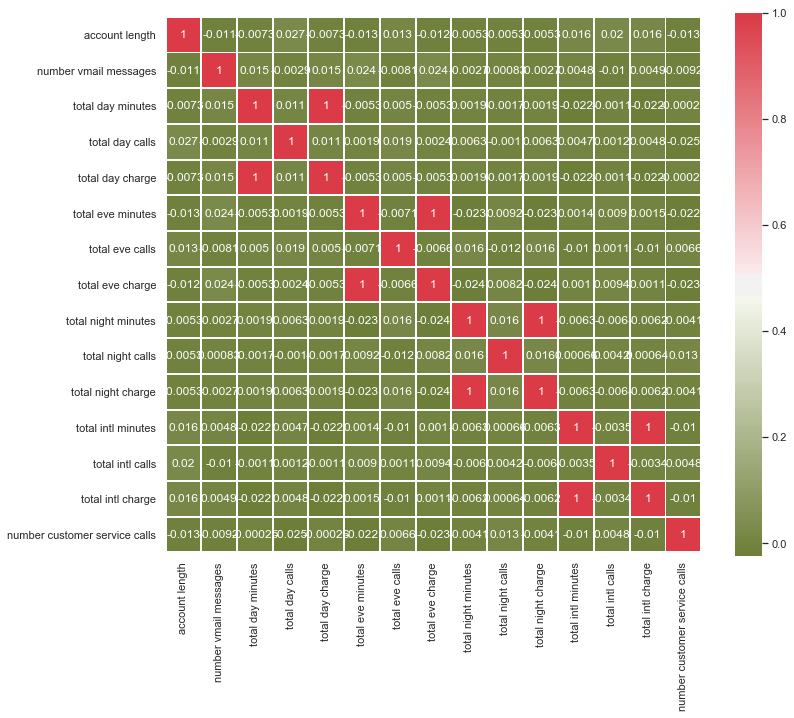

In [1439]:
sns.set()
f, ax = plt.subplots(figsize=(12,10))

corr_matrix = br_corr.corr()

sns.heatmap(corr_matrix, mask = np.zeros_like(corr_matrix, dtype=np.bool), cmap = sns.diverging_palette(27100,10, as_cmap= True),
            annot = True , linewidths = 0.9,square = True, ax=ax)

In [1440]:
#loop for chi square values
for i in variable_cat:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(churn_red['Churn'], churn_red[i]))
    print(p)

international plan
1.9443947474998577e-74
voice mail plan
7.164501780988496e-15
Churn
0.0


In [1441]:
#From above correlation chart we can clearly see that there is high correlation between few variables hence we will drop few 
#drop those variables. The variable we are going to drop are 'total day minutes' ,'total eve minutes','total night minutes'
#and 'total intl minutes'

In [125]:
churn_red = churn_red.drop(['total day minutes','total night minutes','total eve minutes', 'total intl minutes'], axis=1)

In [126]:
churn_red.shape

(5000, 14)

In [127]:
#Storing updated continuous and categorical variable in different objects
variable_num_update = ['account length', 'number vmail messages','total day calls', 'total day charge','total eve calls',
                'total eve charge','total night calls','total night charge','total intl calls','total intl charge',
                'number customer service calls']


variable_cat_update = ['international plan', 'voice mail plan', 'Churn']

# Checking Distribution of data

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


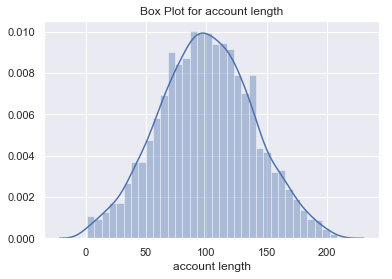

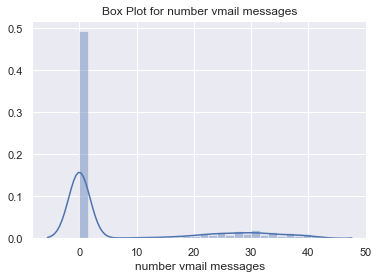

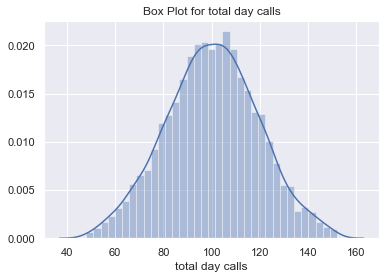

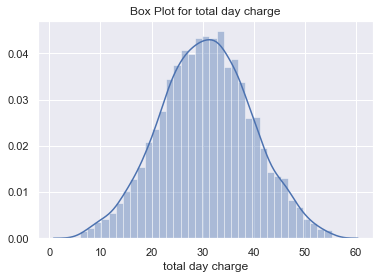

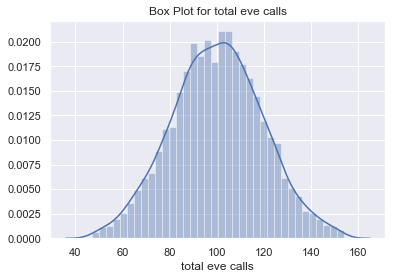

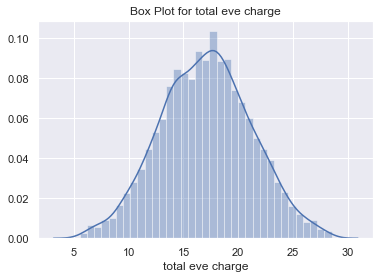

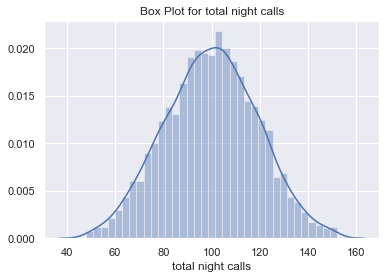

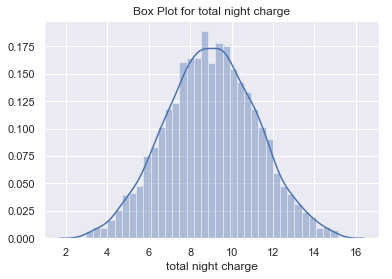

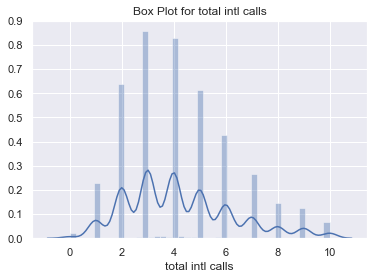

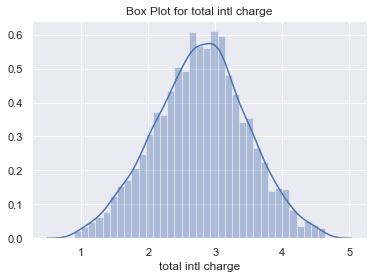

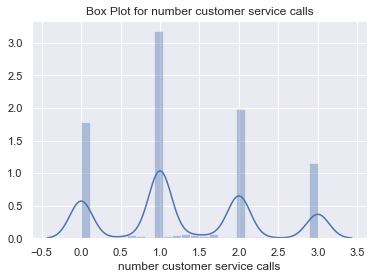

In [1445]:
#Drawing histogram to check distribution of numeric varriable
sns.set()
for i in variable_num_update:
    sns.distplot(churn_red[i])
    plt.title("Box Plot for "+str(i))
    plt.show()

In [128]:
#As from above distribution plots we can clearly see that data is normally distributed hence we can apply standardisation.
for i in variable_num_update:
    print(i)
    churn_red[i] = (churn_red[i] - churn_red[i].mean())/churn_red[i].std()

account length
number vmail messages
total day calls
total day charge
total eve calls
total eve charge
total night calls
total night charge
total intl calls
total intl charge
number customer service calls


In [1447]:
churn_red.head(5)

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn
0,0.729680,0.0,1.0,1.368521,0.510514,1.618908,-0.064526,-0.066337,-0.461033,0.909281,-0.596755,-0.117152,-0.329016,0.0
1,0.188929,0.0,1.0,1.445884,1.188521,-0.358847,0.142540,-0.104992,0.164915,1.110030,-0.596755,1.332756,-0.329016,0.0
2,0.961430,0.0,0.0,-0.565547,0.719132,1.204254,0.504906,-1.631853,0.217077,-0.774266,0.372473,0.738294,-1.383732,0.0
3,-0.403323,1.0,0.0,-0.565547,-1.523505,2.274040,-0.633958,-0.919454,-0.565358,-0.071647,1.341700,-1.451067,0.725700,0.0
4,-0.635073,1.0,0.0,-0.565547,0.666977,-0.261083,1.126105,-1.073776,1.103837,-0.276958,-0.596755,-0.073655,1.780416,0.0


# Model Development

In [129]:
#Making copy
CR = churn_red.copy()
CR1 = churn_red.copy()

In [131]:
churn_red.head(5)

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn
0,0.729680,0.0,1.0,1.368521,0.510514,1.618908,-0.064526,-0.066337,-0.461033,0.909281,-0.596755,-0.117152,-0.329016,0.0
1,0.188929,0.0,1.0,1.445884,1.188521,-0.358847,0.142540,-0.104992,0.164915,1.110030,-0.596755,1.332756,-0.329016,0.0
2,0.961430,0.0,0.0,-0.565547,0.719132,1.204254,0.504906,-1.631853,0.217077,-0.774266,0.372473,0.738294,-1.383732,0.0
3,-0.403323,1.0,0.0,-0.565547,-1.523505,2.274040,-0.633958,-0.919454,-0.565358,-0.071647,1.341700,-1.451067,0.725700,0.0
4,-0.635073,1.0,0.0,-0.565547,0.666977,-0.261083,1.126105,-1.073776,1.103837,-0.276958,-0.596755,-0.073655,1.780416,0.0


# Decision Tree Classifier

In [132]:
#Divide data into train and test
X = churn_red.values[:, 0:13]
Y = churn_red.values[:,13]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [133]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

In [134]:
#predict new test cases
C50_Predictions = C50_model.predict(X_test)

In [135]:
#Decision tree and classifier. here we are using C5.0 model
clf = tree.DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train)

In [136]:
#predict new test cases
y_pred = clf.predict(X_test)

# Error Metrics

In [1455]:
cm = confusion_matrix(y_test, y_pred)

In [1456]:
cm

array([[800,  50],
       [ 47, 103]], dtype=int64)

In [1457]:
cm = pd.crosstab(y_test, y_pred)

In [1458]:
cm

col_0,0.0,1.0
row_0,,
0.0,800,50
1.0,47,103


In [1459]:
##Let us save TP, TN, FP, FN
TN = cm.iloc[0,0]
FP = cm.iloc[0,1]
FN = cm.iloc[1,0]
TP = cm.iloc[1,1]

In [1460]:
TN, FP

(800, 50)

In [1461]:
#Checking accuracy of model
accuracy_score(y_test, y_pred)*100

90.3

In [1462]:
#Here we have used recall error metrics to see who are customers who have actually churned out. So, it will help our client 
#to work on those customers by providing some good deals or by some other marketing mean to retain those customers back.
#Recall rate(True positivve)
(TP*100)/(TP+FN)

68.66666666666667

In [296]:
#Results
#Accuracy: 90.3
##Recall rate(True positivve): 68.66

# Random Forest

In [69]:
#Loading copy again
churn_red = CR.copy()

In [1533]:
churn_red.head(5)

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn
0,0.729680,0.0,1.0,1.368521,0.510514,1.618908,-0.064526,-0.066337,-0.461033,0.909281,-0.596755,-0.117152,-0.329016,0.0
1,0.188929,0.0,1.0,1.445884,1.188521,-0.358847,0.142540,-0.104992,0.164915,1.110030,-0.596755,1.332756,-0.329016,0.0
2,0.961430,0.0,0.0,-0.565547,0.719132,1.204254,0.504906,-1.631853,0.217077,-0.774266,0.372473,0.738294,-1.383732,0.0
3,-0.403323,1.0,0.0,-0.565547,-1.523505,2.274040,-0.633958,-0.919454,-0.565358,-0.071647,1.341700,-1.451067,0.725700,0.0
4,-0.635073,1.0,0.0,-0.565547,0.666977,-0.261083,1.126105,-1.073776,1.103837,-0.276958,-0.596755,-0.073655,1.780416,0.0


In [1534]:
#Divide data into train and test
X = churn_red.values[:, 0:13]
Y = churn_red.values[:,13]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [1535]:
#Random Forest
RF_model = RandomForestClassifier(n_estimators = 20).fit(X_train, y_train)

In [1536]:
RF_Predictions = RF_model.predict(X_test)

In [1537]:
#build confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [1538]:
cm

array([[724, 139],
       [123,  14]], dtype=int64)

In [1539]:
cm = pd.crosstab(y_test, RF_Predictions)

In [1540]:
cm

col_0,0.0,1.0
row_0,,
0.0,857,6
1.0,75,62


In [1541]:
#let us save TP, TN, FP, FN
TN = cm.iloc[0,0]
FN = cm.iloc[1,0]
TP = cm.iloc[1,1]
FP = cm.iloc[0,1]

In [1542]:
TN

857

In [1543]:
#Accuracy score
accuracy_score(y_test,y_pred)*100

73.8

In [1544]:
#Recall rate(True positivve)
(TP*100)/(TP+FN)

45.25547445255474

In [1520]:
#Accuracy: 73.8
#Recall rate(True positivve) : 45.25

# Logistic Regression

In [137]:
#Loading copy again
churn_red = CR1.copy()

In [138]:
#Let us prepare data for logistic regression
#replace target categories with Yes or No
churn_red['Churn'] = churn_red['Churn'].replace('No', 0)
churn_red['Churn'] = churn_red['Churn'].replace('Yes', 1 )

In [139]:
churn_red.head(5)

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn
0,0.729680,0.0,1.0,1.368521,0.510514,1.618908,-0.064526,-0.066337,-0.461033,0.909281,-0.596755,-0.117152,-0.329016,0.0
1,0.188929,0.0,1.0,1.445884,1.188521,-0.358847,0.142540,-0.104992,0.164915,1.110030,-0.596755,1.332756,-0.329016,0.0
2,0.961430,0.0,0.0,-0.565547,0.719132,1.204254,0.504906,-1.631853,0.217077,-0.774266,0.372473,0.738294,-1.383732,0.0
3,-0.403323,1.0,0.0,-0.565547,-1.523505,2.274040,-0.633958,-0.919454,-0.565358,-0.071647,1.341700,-1.451067,0.725700,0.0
4,-0.635073,1.0,0.0,-0.565547,0.666977,-0.261083,1.126105,-1.073776,1.103837,-0.276958,-0.596755,-0.073655,1.780416,0.0


In [140]:
#Create logistic data. Save target variable first
churn_red_logit = pd.DataFrame(churn_red['Churn'])

In [141]:
churn_red_logit.shape

(5000, 1)

In [142]:
#Add continous variables
churn_red_logit = churn_red_logit.join(churn_red[variable_num_update])

In [143]:
churn_red_logit.shape

(5000, 12)

In [144]:
##Create dummies for categorical variables
variable_cat_update = ['international plan', 'voice mail plan']

for i in variable_cat_update:
    temp = pd.get_dummies(churn_red[i], prefix = i)
    churn_red_logit = churn_red_logit.join(temp)

In [145]:
churn_red_logit.head(5)

,Churn,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,international plan_0.0,international plan_1.0,voice mail plan_0.0,voice mail plan_1.0
0,0.0,0.729680,1.368521,0.510514,1.618908,-0.064526,-0.066337,-0.461033,0.909281,-0.596755,-0.117152,-0.329016,1,0,0,1
1,0.0,0.188929,1.445884,1.188521,-0.358847,0.142540,-0.104992,0.164915,1.110030,-0.596755,1.332756,-0.329016,1,0,0,1
2,0.0,0.961430,-0.565547,0.719132,1.204254,0.504906,-1.631853,0.217077,-0.774266,0.372473,0.738294,-1.383732,1,0,1,0
3,0.0,-0.403323,-0.565547,-1.523505,2.274040,-0.633958,-0.919454,-0.565358,-0.071647,1.341700,-1.451067,0.725700,0,1,1,0
4,0.0,-0.635073,-0.565547,0.666977,-0.261083,1.126105,-1.073776,1.103837,-0.276958,-0.596755,-0.073655,1.780416,0,1,1,0


In [146]:
churn_red_logit.shape

(5000, 16)

In [147]:
#Splitting the data
Sample_Index = np.random.rand(len(churn_red_logit)) < 0.8

train = churn_red_logit[Sample_Index]
test = churn_red_logit[~Sample_Index]

In [148]:
#select column indexes for independent variables
train_cols = train.columns[1:16]

In [1496]:
#Built Logistic Regression

logit = sm.Logit(train['Churn'], train[train_cols]).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.351780
         Iterations 7


C:\Users\Aditya\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3986
Method:                           MLE   Df Model:                           13
Date:                Sat, 16 Feb 2019   Pseudo R-squ.:                  0.1409
Time:                        04:37:42   Log-Likelihood:                -1407.1
converged:                       True   LL-Null:                       -1637.9
                                        LLR p-value:                 2.095e-90
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
account length                    0.0613      0.049      1.261      0.207      -0.034       0.157
number vmail messages             0.1781      0.195      0.915      0.360      -0.204       0.560
total day calls                   0.0654      0.048      1.370      0.171      -0.028       0.159
total day charge                  0.5765      0.051     11.264      0.000       0.476       0.677
total eve calls                   0.0099      0.049      0.202      0.840      -0.086       0.106
total eve charge                  0.2488      0.049      5.043      0.000       0.152       0.345
total night calls                -0.0251      0.049     -0.517      0.605      -0.120       0.070
total night charge                0.1777      0.048      3.665      0.000       0.083       0.273
total intl calls                 -0.2224      0.051     -4.364      0.000      -0.322      -0.123
total intl charge                 0.1357      0.049      2.759      0.006       0.039       0.232
number customer service calls     0.0205      0.049      0.421      0.674      -0.075       0.116
international plan_0.0           -1.7897        nan        nan        nan         nan         nan
international plan_1.0            0.1060        nan        nan        nan         nan         nan
voice mail plan_0.0              -0.1380        nan        nan        nan         nan         nan
voice mail plan_1.0              -1.5456        nan        nan        nan         nan         nan
=================================================================================================
"""

In [1497]:
#Predict test data
#We are creating new variable where we will calculate and store actual probabilty
test['Actual_prob'] = logit.predict(test[train_cols])

C:\Users\Aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1498]:
test.head(5)

,Churn,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,international plan_0.0,international plan_1.0,voice mail plan_0.0,voice mail plan_1.0,Actual_prob
1,0.0,0.188929,1.445884,1.188521,-0.358847,0.142540,-0.104992,0.164915,1.110030,-0.596755,1.332756,-0.329016,1,0,0,1,0.061802
6,0.0,0.549429,1.291158,-0.636881,0.722176,0.401373,-0.277523,0.947350,0.252287,1.341700,-1.088590,1.780416,1,0,0,1,0.041075
8,0.0,0.446429,-0.565547,-0.167492,0.079406,-1.048090,0.911575,-0.513195,0.316162,-0.112141,-0.624620,-0.329016,1,0,1,0,0.148378
10,1.0,-0.520173,-0.565547,1.918681,-0.979143,-0.892790,0.571466,0.582214,0.174725,0.857087,0.941281,0.398901,1,0,1,0,0.082859
12,0.0,1.759682,-0.565547,-0.219646,-0.984761,-1.513989,-1.965250,1.468973,-1.216825,-1.081369,0.346819,-0.329016,1,0,1,0,0.048395


In [1499]:
#Here we are probabilities into classified form of yes or no.
test['ActualVal'] = 1
test.loc[test.Actual_prob < 0.5, 'ActualVal'] = 0

C:\Users\Aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Aditya\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [1500]:
test.head(5)

,Churn,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,international plan_0.0,international plan_1.0,voice mail plan_0.0,voice mail plan_1.0,Actual_prob,ActualVal
1,0.0,0.188929,1.445884,1.188521,-0.358847,0.142540,-0.104992,0.164915,1.110030,-0.596755,1.332756,-0.329016,1,0,0,1,0.061802,0
6,0.0,0.549429,1.291158,-0.636881,0.722176,0.401373,-0.277523,0.947350,0.252287,1.341700,-1.088590,1.780416,1,0,0,1,0.041075,0
8,0.0,0.446429,-0.565547,-0.167492,0.079406,-1.048090,0.911575,-0.513195,0.316162,-0.112141,-0.624620,-0.329016,1,0,1,0,0.148378,0
10,1.0,-0.520173,-0.565547,1.918681,-0.979143,-0.892790,0.571466,0.582214,0.174725,0.857087,0.941281,0.398901,1,0,1,0,0.082859,0
12,0.0,1.759682,-0.565547,-0.219646,-0.984761,-1.513989,-1.965250,1.468973,-1.216825,-1.081369,0.346819,-0.329016,1,0,1,0,0.048395,0


In [1501]:
#Build confusion matrix
CM = pd.crosstab(test['Churn'], test['ActualVal'])

In [1502]:
CM

ActualVal,0,1
Churn,,
0.0,846,17
1.0,118,19


In [1503]:
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [1504]:
TN

846

In [1505]:
#check accuracy of model
((TP+TN)*100)/(TP+TN+FP+FN)

86.5

In [1506]:
#Recall rate(True positivve)
(TP*100)/(TP+FN)

13.86861313868613

In [1061]:
#Accuracy: 86.5
#Recall rate(True positivve) : 13.86

In [ ]:
#Decision tree classifier model is performing better than random forest and logistic regression. Hence we will apply decision
#tree classifier.

In [1548]:
#Loading copy again
churn_red = df.copy()

In [1549]:
churn_red['Churn'] = churn_red['Churn'].replace(0, 'No')
churn_red['Churn'] = churn_red['Churn'].replace(1, 'Yes')

In [1550]:
churn_red['international plan'] = churn_red['international plan'].replace(0, 'No')
churn_red['international plan'] = churn_red['international plan'].replace(1, 'Yes')

In [1551]:
churn_red['voice mail plan'] = churn_red['voice mail plan'].replace(0, 'No')
churn_red['voice mail plan'] = churn_red['voice mail plan'].replace(1, 'Yes')

In [1552]:
churn_red.head(5)

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,128.0,No,Yes,25.0,265.1,110.0,45.07,197.40000,99.0,16.780000,244.7,91.0,11.01,10.0,3.0,2.70,1.0,No
1,107.0,No,Yes,26.0,161.6,123.0,27.47,195.50000,103.0,16.620000,254.4,103.0,11.45,13.7,3.0,3.70,1.0,No
2,137.0,No,No,0.0,243.4,114.0,41.38,121.20000,110.0,10.300000,162.6,104.0,7.32,12.2,5.0,3.29,0.0,No
3,84.0,Yes,No,0.0,299.4,71.0,50.90,155.89725,88.0,13.248769,196.9,89.0,8.86,6.6,7.0,1.78,2.0,No
4,75.0,Yes,No,0.0,166.7,113.0,28.34,148.30000,122.0,12.610000,186.9,121.0,8.41,10.1,3.0,2.73,3.0,No


C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


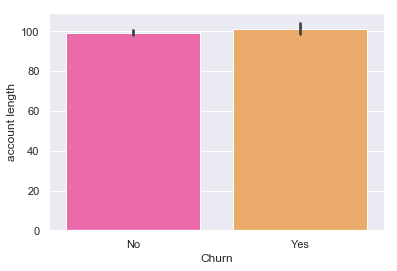

In [1067]:
sns.barplot(x='Churn', y='account length', palette = 'spring',  data = churn_red)

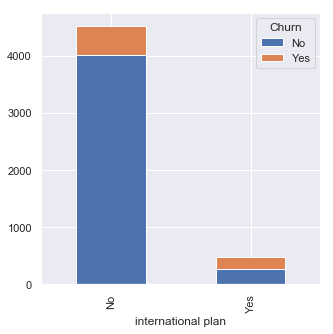

In [1068]:
churn_red.groupby(["international plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

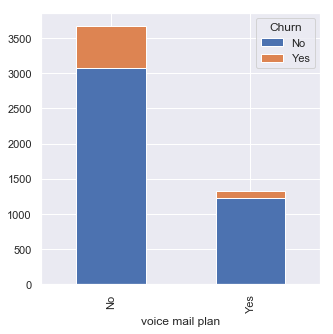

In [1069]:
churn_red.groupby(["voice mail plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


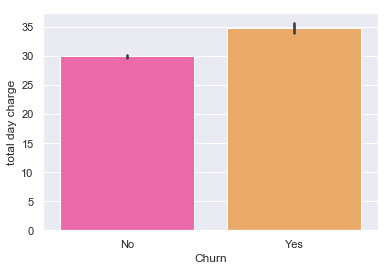

In [1070]:
sns.barplot(x='Churn', y='total day charge', palette = 'spring',  data = churn_red)

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


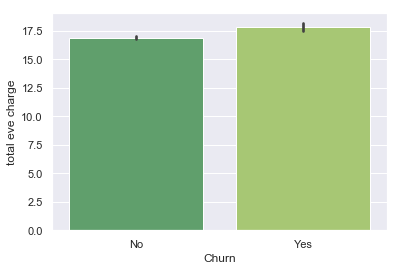

In [1071]:
sns.barplot(x='Churn', y='total eve charge', palette = 'summer',  data = churn_red)

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


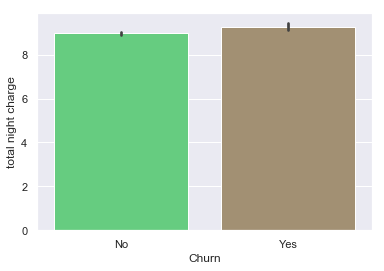

In [1072]:
sns.barplot(x='Churn', y='total night charge', palette = 'terrain',  data = churn_red)

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


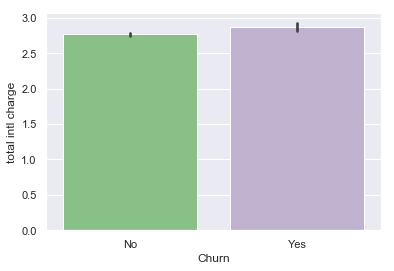

In [1073]:
sns.barplot(x='Churn', y='total intl charge', palette = 'Accent',  data = churn_red)

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


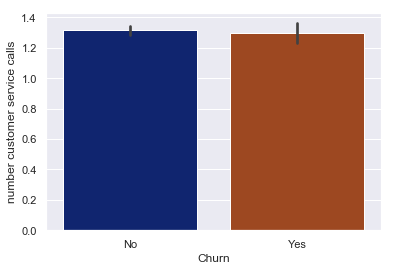

In [1554]:
sns.barplot(x='Churn', y='number customer service calls', palette = 'dark',  data = churn_red)